# Benchmarcks and plots of various SVM RL envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [31]:
## All the data stored in the hdf5 file
f = h5py.File('run_0.hdf5', 'r')

list(f)

['actor_models',
 'critic_models',
 'energies',
 'hyperparams',
 'info',
 'princip_dims',
 'rewards',
 'sigmas']

In [32]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v1
add_noise_every  :  1
batch_size  :  64
bootstrap_size  :  1
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [45]:
## Example of data stored and number of episodes
print(list(f['sigmas'].keys()))

print('The number of episodes is then:', len(f['sigmas'].keys()))

['sigmas_ep0', 'sigmas_ep1', 'sigmas_ep2', 'sigmas_ep3', 'sigmas_ep4', 'sigmas_ep5', 'sigmas_ep6', 'sigmas_ep7', 'sigmas_ep8', 'sigmas_ep9']
The number of episodes is then: 10


The max score is at episode 0 and is equal to 3.821841239929199
The max score is at episode 1 and is equal to 0.0


Text(0.5, 0, 'Episode #')

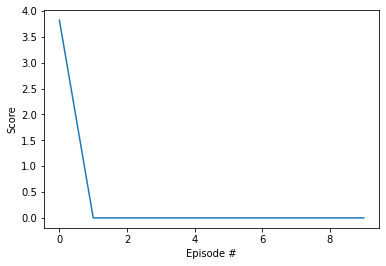

In [30]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
i = 0
for k in f['rewards'].keys():
     scores[i] = np.sum(f['rewards'][k][:])

## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The max score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  0.19731963


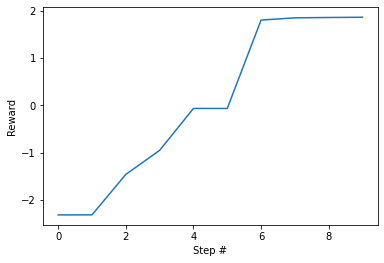

In [37]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

The last energy reached is =  -0.0334395


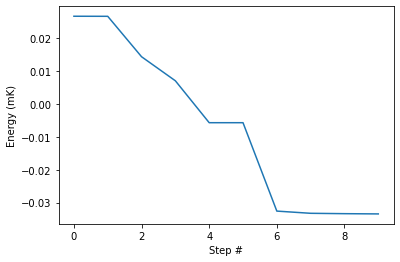

In [38]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

The last princip dim reached is =  10


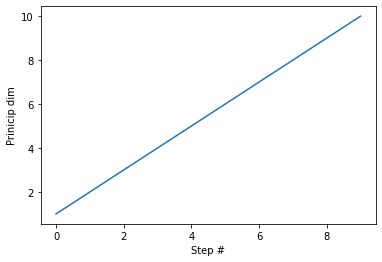

In [41]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

(array([2., 2., 1., 1., 1., 0., 0., 1., 0., 2.]),
 array([4368.417 , 4820.1807, 5271.945 , 5723.7085, 6175.4727, 6627.2363,
        7079.    , 7530.764 , 7982.528 , 8434.292 , 8886.056 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

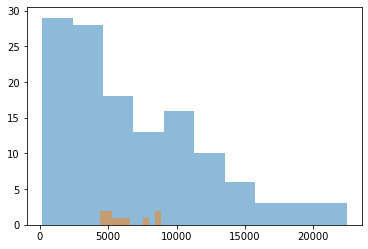

In [57]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep{index_max}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  -11.352773


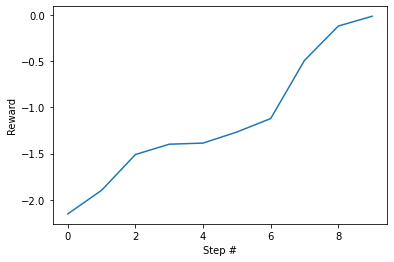

In [42]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

The last energy reached is =  -0.00642337


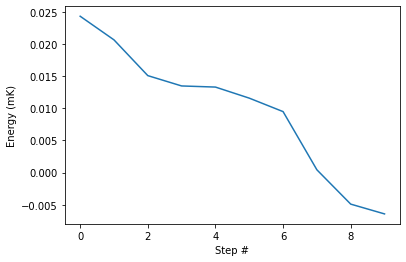

In [43]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

The last princip dim reached is =  10


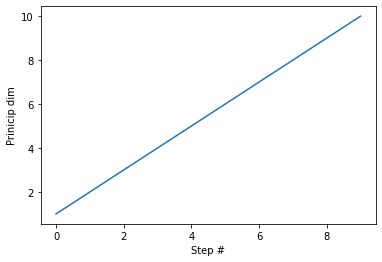

In [44]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])

(array([2., 1., 1., 0., 1., 2., 1., 0., 1., 1.]),
 array([ 5491.8735,  6146.2627,  6800.652 ,  7455.041 ,  8109.43  ,
         8763.819 ,  9418.208 , 10072.598 , 10726.986 , 11381.376 ,
        12035.765 ], dtype=float32),
 <BarContainer object of 10 artists>)

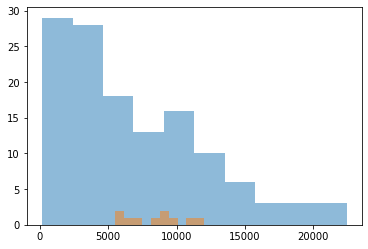

In [58]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep{index_min}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)